Видео лабораторной: https://youtu.be/lkiFy6LQnSk

TG: https://t.me/data_science_news



---

## Введение в ML классификация

### Часть 1
- Логистическая регрессия (бинарный вариант)
- Оценка качества классификации для бинарного случая

### Часть 2
- Логистическая регрессия для трёх и более классов
- Линейный/Квадратный дискриминативный анализ
- Оценка качества классификации для бинарного случая и выбор модели

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from itertools import cycle

# Данные (геометрические параметры разных сортов пшеницы)

In [ ]:
# download dataset
# https://archive.ics.uci.edu/ml/datasets/seeds
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
!head seeds_dataset.txt


--2022-04-13 06:01:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9300 (9.1K) [application/x-httpd-php]
Saving to: ‘seeds_dataset.txt’

seeds_dataset.txt   100%[===================>]   9.08K  --.-KB/s    in 0s      

2022-04-13 06:01:15 (99.1 MB/s) - ‘seeds_dataset.txt’ saved [9300/9300]

15.26	14.84	0.871	5.763	3.312	2.221	5.22	1
14.88	14.57	0.8811	5.554	3.333	1.018	4.956	1
14.29	14.09	0.905	5.291	3.337	2.699	4.825	1
13.84	13.94	0.8955	5.324	3.379	2.259	4.805	1
16.14	14.99	0.9034	5.658	3.562	1.355	5.175	1
14.38	14.21	0.8951	5.386	3.312	2.462	4.956	1
14.69	14.49	0.8799	5.563	3.259	3.586	5.219	1
14.11	14.1	0.8911	5.42	3.302	2.7		5		1
16.63	15.46	0.8747	6.053	3.465	2.04	5.877	1
16.44	15.25	0.888	5.884	3.505	1.969	5.533	1


In [ ]:
# load the data
DATA = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt",
    sep='\t',
    header=None,
    names=["area", "perimeter", "compactness", "length", "width", "asymmetry", "length_groove", "class"],
    on_bad_lines='skip')
DATA

,area,perimeter,compactness,length,width,asymmetry,length_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


In [ ]:
DATA.describe()

,area,perimeter,compactness,length,width,asymmetry,length_groove,class
count,210.000000,210.000000,207.000000,210.000000,209.000000,210.000000,206.000000,206.000000
mean,14.847524,14.559286,0.871280,5.563918,3.281440,3.693530,5.407529,2.084039
std,2.909699,1.305959,0.023306,0.719594,0.419907,1.495112,0.532330,0.948211
min,10.590000,12.410000,0.808100,0.818900,2.630000,0.765100,3.485000,1.000000
25%,12.270000,13.450000,0.857700,5.244750,2.956000,2.600250,5.045000,1.000000
50%,14.355000,14.320000,0.873500,5.518000,3.245000,3.599000,5.226000,2.000000
75%,17.305000,15.715000,0.887650,5.979750,3.566000,4.768750,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,5.325000,8.456000,6.735000,5.439000


In [ ]:
# set int type for dependent variable
DATA = DATA.dropna()
DATA["class"] = DATA["class"].astype('int32')
DATA


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,area,perimeter,compactness,length,width,asymmetry,length_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


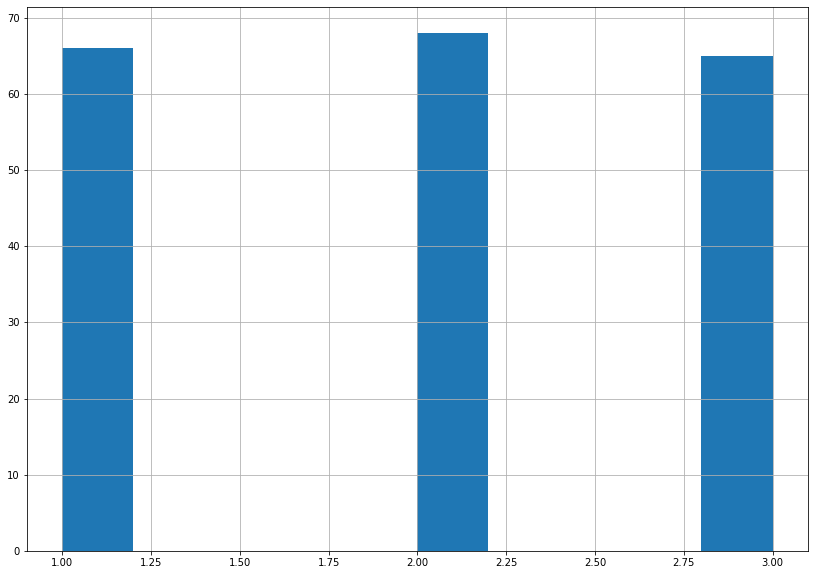

In [ ]:
DATA["class"].hist(figsize=(14,10))

In [ ]:
# data preparation
X = DATA.loc[:, DATA.columns != 'class'].to_numpy()
y = DATA["class"].to_numpy()
X, y

(array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
        [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
        [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
        ...,
        [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
        [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
        [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0, shuffle=True)
X_train.shape, X_test.shape

((133, 7), (66, 7))

(array([44.,  0.,  0.,  0.,  0., 49.,  0.,  0.,  0., 40.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

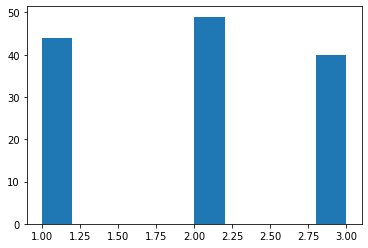

In [ ]:
plt.hist(y_train)

(array([22.,  0.,  0.,  0.,  0., 19.,  0.,  0.,  0., 25.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

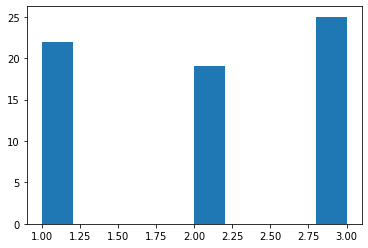

In [ ]:
plt.hist(y_test)

# Логистическая регрессия для трех и более классов

Пусть нам даны пары наблюдений $(Y_1,X_1),...,(Y_n,X_n)$, где $Y_i$ представленна в виде $k$ категорий/классов $\{1,...,K\}$, а $X \in R^d$.

## Вариант 1 - обобщённая бинарная модель (multinomial logit)

Модель логистической регрессия применяется для моделирования вероятностей возникновения $K$ взаимоисключающих классов через линейную завистмость от $X$.

Обобщённый вартант логистической регрессии для $K>2$ классов это мультиномиальная логистическая регрессия.

$\mathrm{log}\frac{\mathbb{P}(Y=1|X)}{\mathbb{P}(Y=K|X)}=\beta_{10}+\beta_1^TX$

$\mathrm{log}\frac{\mathbb{P}(Y=2|X)}{\mathbb{P}(Y=K|X)}=\beta_{20}+\beta_2^TX$

...

$\mathrm{log}\frac{\mathbb{P}(Y=K-1|X)}{\mathbb{P}(Y=K|X)}=\beta_{(K-1)0}+\beta_{K-1}^TX$

То есть, модель задаёт $K-1$ уравнений log отношения шансов к $K$ классу в условиях суммы вероятностей возникновения $K$ классов равной 1, то есть:

$\mathbb{P}(Y=k|X)=\frac{\exp{\beta_{k0}+\beta_k^TX}}{1+\sum_{i=1}^{K-1}\exp{\beta_{i0}+\beta_i^TX}}$, где $k=1,...,K-1$

$\mathbb{P}(Y=K|X)=\frac{1}{1+\sum_{i=1}^{K-1}\exp{\beta_{i0}+\beta_i^TX}}$.

Лог-функция максимального правдоподобия **(log-likelihood)** имеет вид:

$$\ell(\theta) = \Sigma_{i=1}^N \log p_{gi}(X_i,\theta)$$

где $p_k(X_i;\theta)=\mathbb{P}(Y=k|X;\theta)$

Решения в общем виде не существует, значения $\theta$ минимизирующие $\ell(\theta)$ могут быть получены методами численной оптимизации.

__Мультиномиальная логистическая регрессия предполагает__ независимость нерелеватных вариантов [https://en.wikipedia.org/wiki/Independence_of_irrelevant_alternatives](https://en.wikipedia.org/wiki/Independence_of_irrelevant_alternatives)

## Вариант 2 - One vs Rest (OVR)

OVR это обобщённый метод раширения любого бинарного классификатора для $K>3$ классов. По сути, для каждого отдельного класса, задача сводится к бинарной, то есть для кажого $k$ из $1,...,K$ конструируется новая зависимая переменная $z$, такая что:

$z_i=1$, если $Y_i=k$

$z_i=0$, если $Y_i \neq k$

Далее, для каждого класса подбираются оптимальные коэффициенты на основе бинарного классификатора (в нашем случае это логистическая регрессия).

Формируется функция $f_k$ отражающая набор $K$ класисфикаторов (например, $K$ бинарных логистических регрессий).

Тогда, пронозное значение может быть получено: $\hat{y}=\mathrm{argmax}_{k \in 1...K}f_k(X)$

## Вартант 3 - One Vs One (OVO)

В этом подходе, задача сводится к бинарной путём формирования группу классов "каждый с каждым", таким образом, получается $\frac{K(K-1)}{2}$ классификаторов. На этапе вывода, аналогично OVR, прогнозное значение присваивается класисифкатору с наибольшей вероятностью.




In [ ]:
# logistic regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(penalty='none', multi_class='ovr', solver='newton-cg')
clf.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', penalty='none', solver='newton-cg')

# Оценка производительности модели

## Бинарный случай

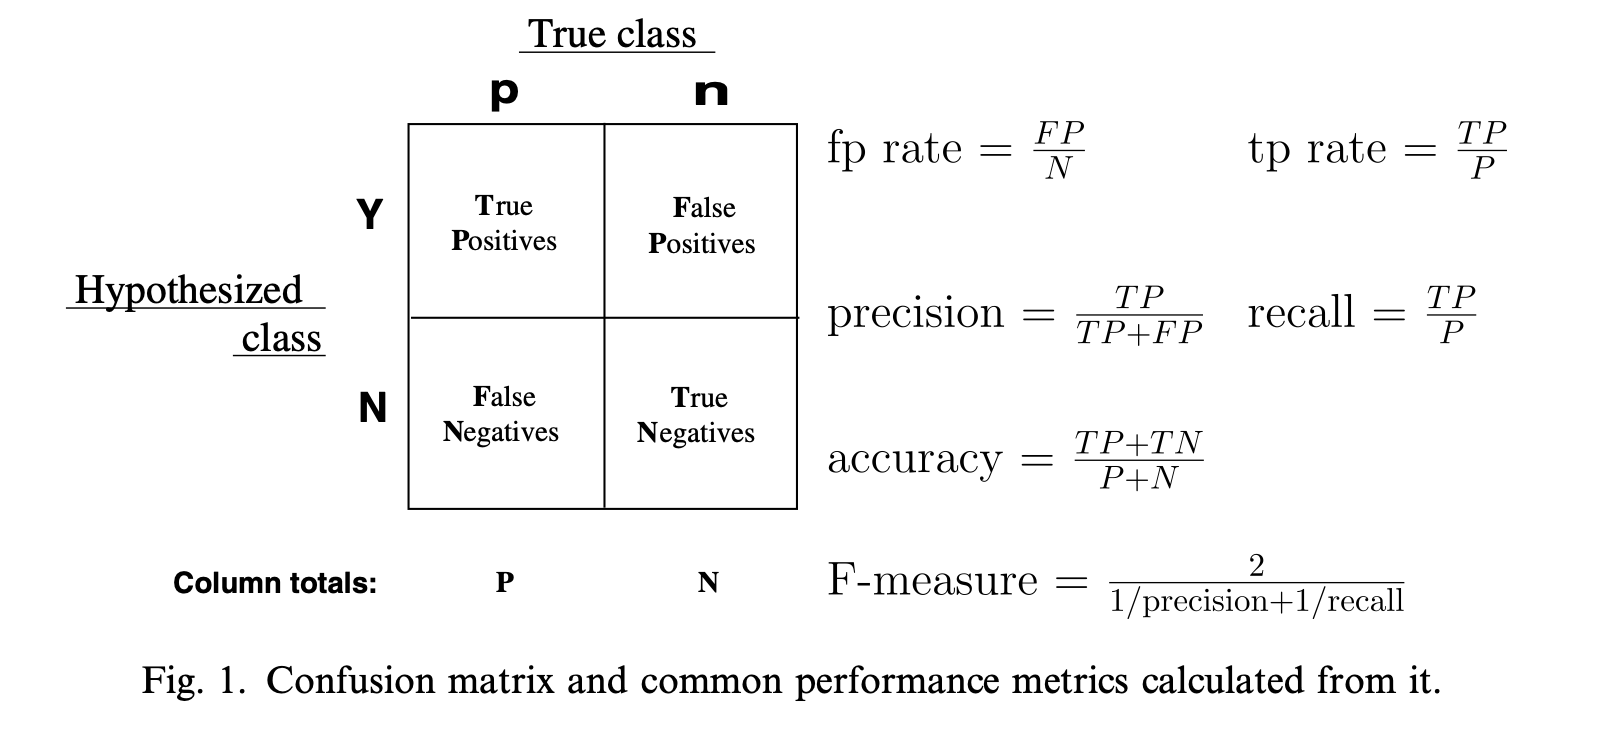

Fawcett, Tom. "An introduction to ROC analysis." Pattern recognition letters 27.8 (2006): 861-874.


## K>3

$\mathrm{precision}_k=\frac{TP_k}{TP_k+\sum_{i=1}^K FP_{k \rightarrow i}}$

$\mathrm{recall}_k=\frac{TP_k}{TP_k+\sum_{i=1}^K FN_{k \rightarrow i}}$

$\mathrm{tpr}_k=\frac{TP_K}{TP_k+\sum_{i=1}^K FN_{k \rightarrow i}}$

$\mathrm{fpr}_k=\frac{FP_K}{|Y \neq k|}$

$\mathrm{macro\ precision}=\frac{\sum_{i=1}^K\mathrm{precision}_K}{K}$

$\mathrm{micro\ precision}= \frac{\sum_{i=1}^K TP_i}{\sum_{i=1}^K TP_i+\sum_{i=1}^K\sum FP_i}$





In [ ]:
# Model performance metrics
y_true = y_test
y_pred = clf.predict(X_test)
# precision, recall, f1, overall accuracy
print(classification_report(y_true,y_pred))

y_true, y_pred

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        22
           2       1.00      0.95      0.97        19
           3       0.89      1.00      0.94        25

    accuracy                           0.95        66
   macro avg       0.96      0.95      0.96        66
weighted avg       0.96      0.95      0.95        66



(array([1, 3, 2, 2, 3, 3, 1, 3, 1, 3, 1, 2, 3, 3, 2, 1, 1, 2, 1, 2, 3, 3,
        1, 3, 1, 2, 3, 3, 2, 1, 1, 1, 2, 2, 1, 3, 3, 1, 3, 3, 3, 2, 1, 2,
        3, 1, 1, 2, 2, 3, 2, 3, 2, 2, 3, 1, 1, 2, 1, 1, 2, 3, 3, 1, 3, 3],
       dtype=int32),
 array([3, 3, 2, 2, 3, 3, 1, 3, 1, 3, 1, 2, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3,
        1, 3, 1, 2, 3, 3, 2, 1, 1, 1, 2, 2, 3, 3, 3, 1, 3, 3, 3, 2, 1, 2,
        3, 1, 1, 2, 2, 3, 2, 3, 2, 2, 3, 1, 1, 2, 1, 1, 2, 3, 3, 1, 3, 3],
       dtype=int32))

In [ ]:
# confusion matrix for the best threshold
confusion_matrix(y_pred, y_true)

array([[20,  0,  0],
       [ 0, 18,  0],
       [ 2,  1, 25]])

In [ ]:
precision_score(y_true, y_pred, average='micro')

0.9545454545454546

In [ ]:
precision_score(y_true, y_pred, average='macro')

0.9642857142857143

In [ ]:
y_score = clf.predict_proba(X_test)
y_score

array([[2.28972552e-001, 8.39075373e-020, 7.71027448e-001],
       [3.43475032e-007, 1.69079145e-014, 9.99999657e-001],
       [2.75974676e-005, 9.99972403e-001, 3.51162994e-169],
       [1.58112169e-009, 9.99999998e-001, 1.03042150e-129],
       [4.91270080e-006, 7.71746322e-019, 9.99995087e-001],
       [1.72650019e-006, 1.41571111e-013, 9.99998273e-001],
       [1.00000000e+000, 5.75086375e-021, 7.95483592e-084],
       [1.64773367e-014, 4.52900586e-008, 9.99999955e-001],
       [1.00000000e+000, 1.77712925e-031, 2.62594104e-098],
       [1.19169001e-008, 7.30929275e-006, 9.99992679e-001],
       [1.00000000e+000, 2.24123006e-034, 2.90202093e-089],
       [3.74722376e-009, 9.99999996e-001, 5.19403888e-055],
       [1.36196231e-011, 6.55523544e-009, 9.99999993e-001],
       [1.76699473e-010, 2.06544627e-007, 9.99999793e-001],
       [2.16016691e-007, 9.99999784e-001, 1.22329341e-168],
       [7.36151405e-001, 2.63848595e-001, 9.03610140e-093],
       [1.00000000e+000, 4.37951222e-017

In [ ]:
# Binarize the output
y = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y.shape[1]

y

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1,

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

fpr,tpr

({0: array([0.        , 0.        , 0.        , 0.02272727, 0.02272727,
         1.        ]),
  1: array([0., 0., 0., 1.]),
  2: array([0.        , 0.        , 0.        , 0.02439024, 0.02439024,
         0.04878049, 0.04878049, 1.        ]),
  'micro': array([0.        , 0.        , 0.        , 0.00757576, 0.00757576,
         0.01515152, 0.01515152, 0.02272727, 0.02272727, 0.03787879,
         0.03787879, 0.04545455, 0.04545455, 1.        ])},
 {0: array([0.        , 0.63636364, 0.95454545, 0.95454545, 1.        ,
         1.        ]),
  1: array([0.        , 0.05263158, 1.        , 1.        ]),
  2: array([0.  , 0.04, 0.92, 0.92, 0.96, 0.96, 1.  , 1.  ]),
  'micro': array([0.        , 0.21212121, 0.90909091, 0.90909091, 0.92424242,
         0.92424242, 0.95454545, 0.95454545, 0.96969697, 0.96969697,
         0.98484848, 0.98484848, 1.        , 1.        ])})

In [ ]:
roc_auc

{0: 0.9989669421487604,
 1: 1.0,
 2: 0.9970731707317073,
 'micro': 0.9978191000918274}

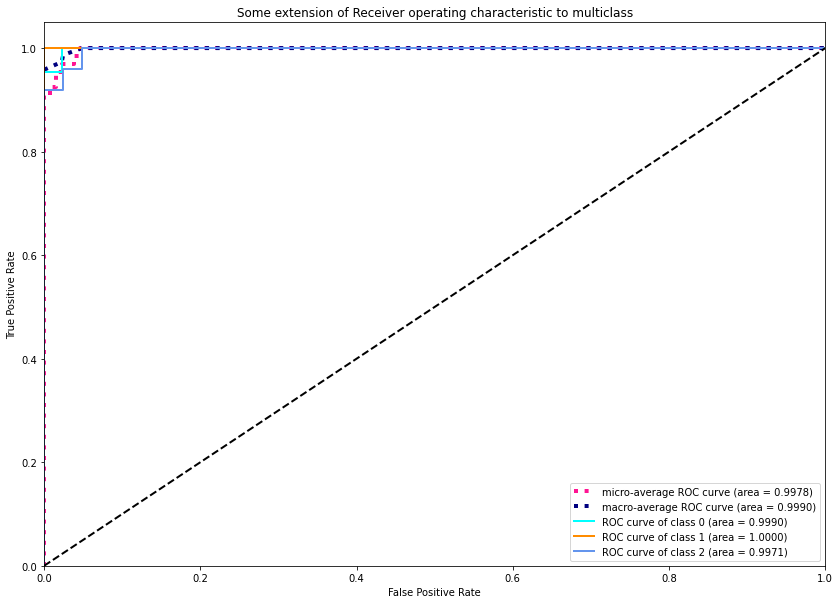

In [ ]:
# source https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(14, 10))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.4f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.4f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_true, clf.predict_proba(X_test), multi_class='ovr')

0.9986800376268224

# Линейный/квадратный дискриминативный анализ

https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda

In [ ]:
#LDA
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [ ]:
# Model performance metrics
y_true = y_test
y_pred = clf_lda.predict(X_test)
# precision, recall, f1, overall accuracy
print(classification_report(y_true,y_pred))

y_true, y_pred

              precision    recall  f1-score   support

           1       0.95      0.91      0.93        22
           2       0.95      1.00      0.97        19
           3       0.96      0.96      0.96        25

    accuracy                           0.95        66
   macro avg       0.95      0.96      0.95        66
weighted avg       0.95      0.95      0.95        66



(array([1, 3, 2, 2, 3, 3, 1, 3, 1, 3, 1, 2, 3, 3, 2, 1, 1, 2, 1, 2, 3, 3,
        1, 3, 1, 2, 3, 3, 2, 1, 1, 1, 2, 2, 1, 3, 3, 1, 3, 3, 3, 2, 1, 2,
        3, 1, 1, 2, 2, 3, 2, 3, 2, 2, 3, 1, 1, 2, 1, 1, 2, 3, 3, 1, 3, 3],
       dtype=int32),
 array([1, 3, 2, 2, 3, 3, 1, 3, 1, 3, 1, 2, 3, 3, 2, 2, 1, 2, 1, 2, 3, 3,
        1, 3, 1, 2, 3, 3, 2, 1, 1, 1, 2, 2, 3, 1, 3, 1, 3, 3, 3, 2, 1, 2,
        3, 1, 1, 2, 2, 3, 2, 3, 2, 2, 3, 1, 1, 2, 1, 1, 2, 3, 3, 1, 3, 3],
       dtype=int32))

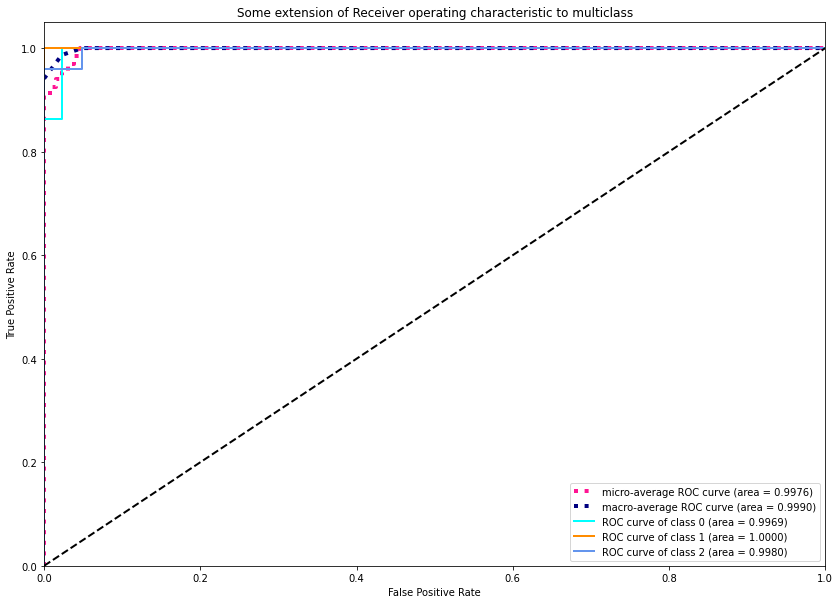

In [ ]:
y_score = clf_lda.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(14, 10))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.4f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.4f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_true, clf_lda.predict_proba(X_test), multi_class='ovr')

0.9983165356446952

In [ ]:
#QDA
clf_qda = QuadraticDiscriminantAnalysis()
clf_qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis()

In [ ]:
# Model performance metrics
y_true = y_test
y_pred = clf_qda.predict(X_test)
# precision, recall, f1, overall accuracy
print(classification_report(y_true,y_pred))

y_true, y_pred

              precision    recall  f1-score   support

           1       0.95      0.86      0.90        22
           2       0.95      1.00      0.97        19
           3       0.92      0.96      0.94        25

    accuracy                           0.94        66
   macro avg       0.94      0.94      0.94        66
weighted avg       0.94      0.94      0.94        66



(array([1, 3, 2, 2, 3, 3, 1, 3, 1, 3, 1, 2, 3, 3, 2, 1, 1, 2, 1, 2, 3, 3,
        1, 3, 1, 2, 3, 3, 2, 1, 1, 1, 2, 2, 1, 3, 3, 1, 3, 3, 3, 2, 1, 2,
        3, 1, 1, 2, 2, 3, 2, 3, 2, 2, 3, 1, 1, 2, 1, 1, 2, 3, 3, 1, 3, 3],
       dtype=int32),
 array([3, 3, 2, 2, 3, 3, 1, 3, 1, 3, 1, 2, 3, 3, 2, 2, 1, 2, 1, 2, 3, 3,
        1, 3, 1, 2, 3, 3, 2, 1, 1, 1, 2, 2, 3, 1, 3, 1, 3, 3, 3, 2, 1, 2,
        3, 1, 1, 2, 2, 3, 2, 3, 2, 2, 3, 1, 1, 2, 1, 1, 2, 3, 3, 1, 3, 3],
       dtype=int32))

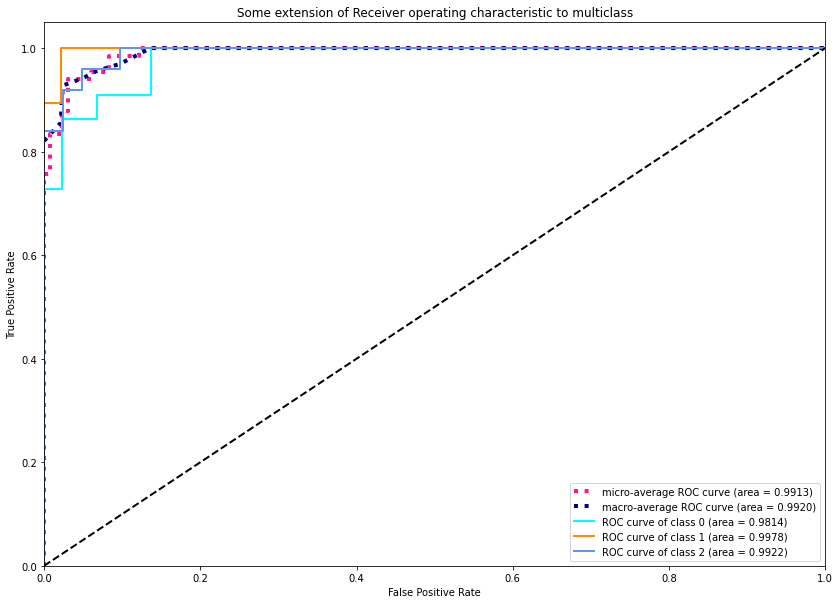

In [ ]:
y_score = clf_qda.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(14, 10))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.4f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.4f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_true, clf_qda.predict_proba(X_test),multi_class="ovr")

0.9904534796571903

# Кросс-валидация и выбор модели

In [ ]:
# data preparation
X = DATA.loc[:, DATA.columns != 'class'].to_numpy()
y = DATA["class"].to_numpy()
X, y

(array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
        [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
        [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
        ...,
        [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
        [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
        [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [ ]:
model_1 = LogisticRegression(penalty='none', multi_class='ovr', solver='newton-cg')
scores = cross_val_score(model_1, X, y, cv=10, scoring='roc_auc_ovr')
print("Logit has %0.4f OvR AUC with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

model_2 = LinearDiscriminantAnalysis()
scores = cross_val_score(model_2, X, y, cv=10, scoring='roc_auc_ovr')
print("LDA has %0.4f OvR AUC with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

model_3 = QuadraticDiscriminantAnalysis()
scores = cross_val_score(model_3, X, y, cv=10, scoring='roc_auc_ovr')
print("QDA has %0.4f OvR AUC with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


Logit has 0.9957 OvR AUC with a standard deviation of 0.01
LDA has 0.9954 OvR AUC with a standard deviation of 0.01
QDA has 0.9879 OvR AUC with a standard deviation of 0.02
